## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.query('converted == 1').shape[0] / df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df[((df['group'] == 'treatment') & (df['landing_page'] != 'new_page')) |
  ((df['group'] != 'treatment') & (df['landing_page'] == 'new_page'))].shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.info()
# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


**The dataset has no missing values.**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Dataframe where treatment does not align with new_page
df[((df['group'] == 'treatment') & (df['landing_page'] != 'new_page')) |
  ((df['group'] != 'treatment') & (df['landing_page'] == 'new_page'))].shape[0]

3893

In [9]:
df2 = df.copy()[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page')) |
               ((df['group'] == 'control') & (df['landing_page'] == 'old_page'))]

In [10]:
df2.shape[0]

290585

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2.drop_duplicates('user_id')

In [16]:
df2.shape[0]

290584

In [17]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
np.mean(df2.converted == 1)

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
np.mean(df2.query('group == "control"').converted == 1)

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
np.mean(df2.query('group == "treatment"').converted == 1)

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
np.mean(df2.landing_page == 'new_page')

0.50006194422266881

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Based on the results from the investigation above, it does not appear that one page leads to more conversions than another. Both groups are nearly even divided, and ther conversion rates between them differ by less than one percent.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**H0**: **$p_{new}$** <= **$p_{old}$**

and

**H1**: **$p_{new}$** > **$p_{old}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
# Convert rate under null
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
# Convert rate under null
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [24]:
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [25]:
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
# Source: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html
new_page_converted = np.random.binomial(n_new, p_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
# Source: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html
old_page_converted = np.random.binomial(n_old, p_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
p_new - p_old

0.0

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [29]:
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

In [30]:
p_diffs.mean()

1.1245044569406855e-05

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

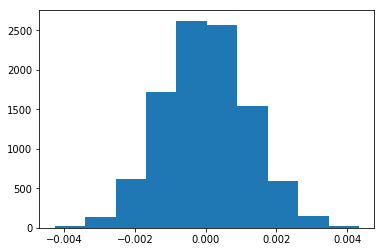

In [31]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
np.mean(p_diffs > new_page_converted - old_page_converted)

1.0

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

__Part J computes the mean of p_diffs that are greater than the difference between the new page and old page conversion rates. This is known as the p-value. In terms of whether or not there is a difference between the new and old page, this value indicates that there is little variance between conversion rates of the old page versus the new.__

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"')['converted'].sum()
convert_new = df2.query('landing_page == "old_page"')['converted'].sum()
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

ImportError: No module named 'statsmodels'

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [ ]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])

In [ ]:
z_score

In [ ]:
p_value

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z score indicates that both old and new convert rates are nearly the same. Since the z_score is near 0.025, we can infer that there is little statistical difference between the two proportions. Additionally the high p_value indicates that there is little likelihood that the alternative is true. These findings align closely to what was calculated in parts j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**As the outcome we hope to predict is categorical in nature and has a limited number of outcomes, logistic regression should be used be utilized for this approach.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [ ]:
df2['intercept'] = 1

In [ ]:
# Source: https://stackoverflow.com/questions/35831061/python-pandas-data-frame-create-new-column-with-label-0-or-1-if-row-value-is-i
df2['ab_page'] = 0
df2['ab_page'] = df2.group.str.match('treatment') * 1 

In [ ]:
df2.head()

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [ ]:
# Apply logistic regression model.
logit_md = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_md.fit()

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [ ]:
results.summary()

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br> 

__0.190. The p-value for ab_page differs from that of Part II as values were pulled from the entire dataset rather than by the dataset filtered by landing page.__

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It's important to consider other factors as additional reasons for conversion as an incomplete analysis may give those building a model the wrong conclusion. It may be the case that a conjunction of factors lead to a conversion, so it is important to analyze other possibilites or one runs the risk of creating flawed model.**

**However, adding additional information could also have negative effects such as showing a correlation between two or more factors that actually have little to do with one another. Furthermore, too many terms could overcomplicate one's model and give incorrect or insignificant results.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?

In [ ]:
countries = pd.read_csv("countries.csv")

In [ ]:
df3 = df2.copy().merge(countries, how='left', on='user_id')

In [ ]:
country_dummies = pd.get_dummies(df3['country'])
df3 = df3.join(country_dummies)
df3.drop(['US'], axis=1, inplace=True)
df3.head()

In [ ]:
logit_md2 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'CA', 'UK']])
results2 = logit_md2.fit()
results2.summary()

**In spite of adding country variables to our model, the conversion rate remains largely the same. This leads one to infer that country does not appear to play a role in in whether a user converts.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [ ]:
page_dummies = pd.get_dummies(df3['landing_page'])
df3 = df3.join(page_dummies)
df3.drop(['old_page'], axis=1, inplace=True)
df3.head()

In [ ]:
try:
    logit_md3 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'CA', 'UK', 'new_page']])
    results3 = logit_md3.fit()
    results3.summary()
except:
    pass

In [ ]:
# Source: https://classroom.udacity.com/nanodegrees/nd002/parts/bb0cbeb6-d3f8-4bae-9dc3-4abba3823e54/modules/82c7c576-88f5-43b6-80fc-c53378527a2d/lessons/49462f74-b030-4bb6-bf67-8281c9181404/concepts/aa9f6f56-8aaf-49c7-a93b-235624a56d3a#
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('converted ~ ab_page + CA + UK + new_page', df3, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [ ]:
vif

**Unlike the addition of country variables, the inclusion of page data to the model does affect the conversion rate. One can see from the results that a case of infinite multicollinearity appears to exist between the new page and ab_page as can be seen by their p-values of 1.0. As such excluding page information from the model is one way to achieve meaningful results.**

### Conclusion

**Based on the findings above, I believe that the null should be accepted. In none of the above tests did the new page lead to a significantly higher conversion rate. Additionally the alternative's p-value of 0.191 in the final model is significantly higher than the alpha of 0.05 for a 95% confidence interval. In light of these inferences, it is recommended that the company keep its old page.**

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])